# Dropout

Dropout layer is designed to randomly skip some inputs during training, which can help generalize the model. This page discusses different ways to work with dropout layers in PyTorch.

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## `p` parameter

It's easy to think about `p` parameter as the **probability that input will be zeroed**.

---

There are some concerns about whether the probability indicates the likelihood of a signal passing through a dropout layer or being zeroed out. The following experiment passes random data through dropout layers with different probabilities and calculates the fraction of zeros in the output of the layers.

tensor([0.0000, 0.1012, 0.1962, 0.2997, 0.4045, 0.4990, 0.6034, 0.7026, 0.8002,
        0.9053])

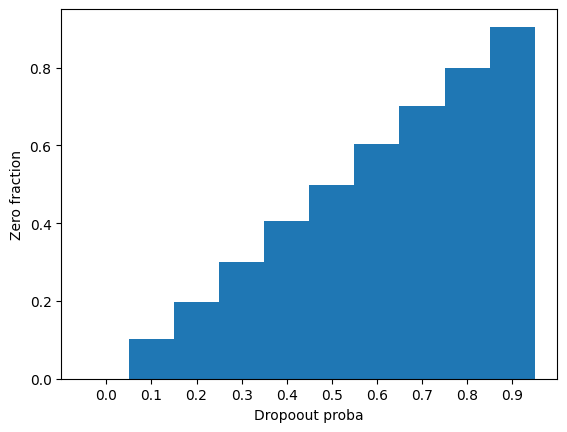

In [47]:
X = np.arange(0, 1, 0.1)
ans = torch.stack([
    torch.nn.Dropout(p=i)(1 + torch.randn(10000)) 
    for i in X
])
proba = (ans == 0).to(dtype=torch.float).mean(dim=1)
display(proba)

plt.bar(X, proba, width=0.1)
plt.xticks(X)
plt.xlabel("Dropoout proba")
plt.ylabel("Zero fraction")
plt.show()

So, as the `p` parameter increases, the fraction of zeros in the output also increases. This confirms that `p` represents the probability of elements being zeroed out in the dropout layer.